## Numpy

#### Importamos librerias y la BD en un archivo csv

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

data = pd.read_csv('session1-pizza - pizza_sales.csv', decimal=",")

#### Serie de tiempo de ventas por día

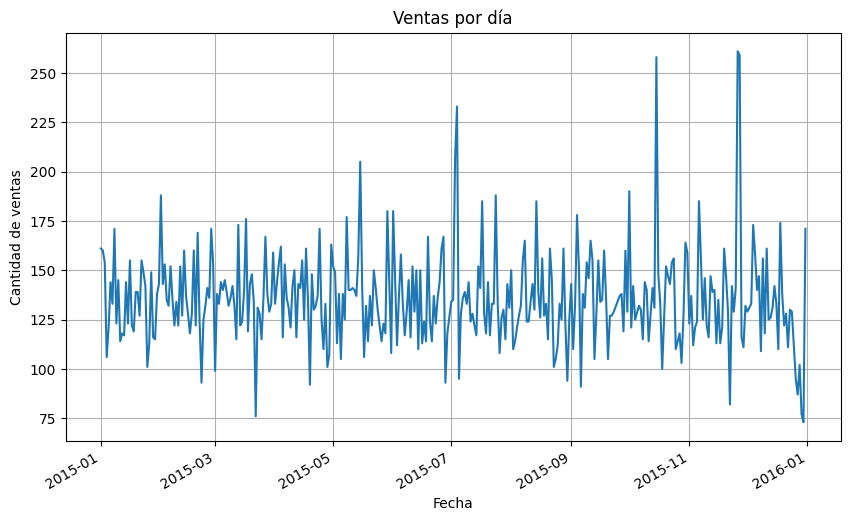

In [6]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')

ventas_diarias = data.groupby(data['order_date']).size()

ventas_diarias.index = pd.to_datetime(ventas_diarias.index)

plt.figure(figsize=(10, 6))
ventas_diarias.plot()
plt.title('Ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ventas')
plt.grid(True)
plt.show()

#### Histograma del tipo de pizza por mes

Ventas por trimestre:
 order_date
2015-03-31    12234
2015-06-30    12331
2015-09-30    12214
2015-12-31    11841
Freq: Q-DEC, dtype: int64
Mejores semanas en venta:
 order_date
2015-11-29    1159
2015-07-05    1048
2015-05-17    1027
2015-04-05    1001
2015-12-06     996
dtype: int64
Peores semanas en venta:
 order_date
2016-01-03    423
2015-01-04    581
2015-09-27    658
2015-12-27    680
2015-10-11    775
dtype: int64


<Figure size 1200x800 with 0 Axes>

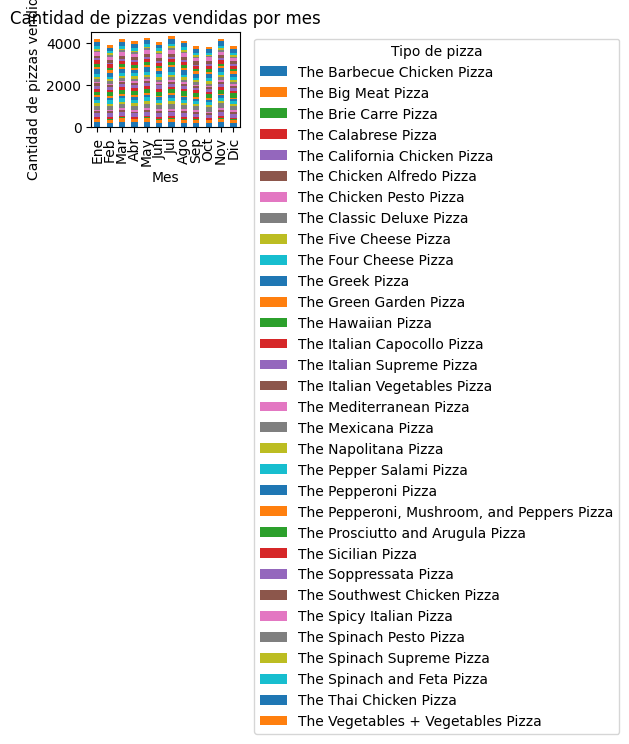

In [7]:
trimestres = ventas_diarias.resample('Q').sum()
print("Ventas por trimestre:\n", trimestres)

semanas_ventas = ventas_diarias.resample('W').sum()
mejores_semanas = semanas_ventas.sort_values(ascending=False).head(5)
peores_semanas = semanas_ventas.sort_values(ascending=True).head(5)
print("Mejores semanas en venta:\n", mejores_semanas)
print("Peores semanas en venta:\n", peores_semanas)

data['order_month'] = data['order_date'].dt.month
pizza_por_mes = data.groupby(['order_month', 'pizza_name']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
pizza_por_mes.plot(kind='bar', stacked=True)
plt.title('Cantidad de pizzas vendidas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pizzas vendidas')
plt.xticks(np.arange(12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Tipo de pizza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Nube de palabras de los ingredientes más usados

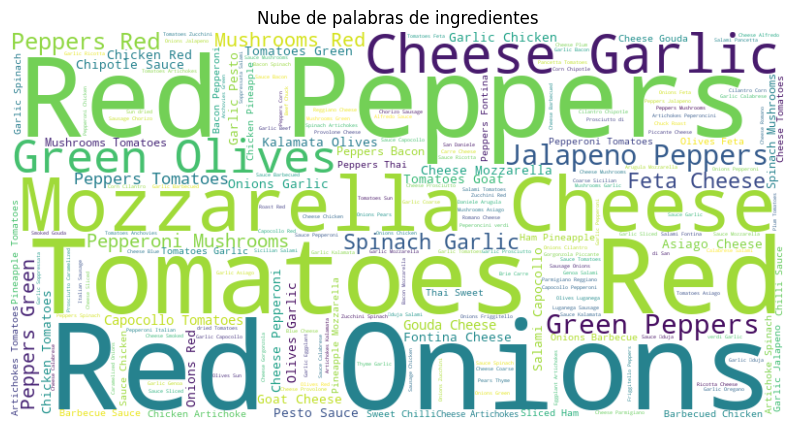

In [8]:
data['pizza_ingredients'] = data['pizza_ingredients'].astype(str)

ingredientes = ' '.join(data['pizza_ingredients'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredientes)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de ingredientes')
plt.show()